# Lab A Step 6: Determining Heave from GNSS

in this step you will create an estimate of heave at the ship's reference point as determined by the GNSS positions combined with the MRU roll pitch and yaw observations.

Later on in the course you will learn more about filtering techniques, here we will use a simple running mean to filter the data.

In [1]:
import import_ipynb
import os.path
from LAB_A_Classes import *
# Create soundings by integrating the various data streams.
# Note that efficiency  and lower memory usage is gained by doing all the integration at the time of reading the data
# More flexibility is achieved by storing the various inout data in their own classes and integrating the results
# in a sounding class

# We also need a Vessel class to store the geometric data descriptive of the vessel

vessel = Vessel()
vessel.lever_arm_trans = np.array([16.26, -1.75,   4.15]).reshape((3, 1))
vessel.lever_arm_rec = np.array([14.82, -2.01,   4.17]).reshape((3, 1))
vessel.lever_arm_pos = np.array([-5.73, -0.12, -30.00]).reshape((3, 1))
vessel.lever_arm_mru = np.array([0, 0, 0]).reshape((3, 1))
vessel.wl = -2.59

# Get the data path
abs_path = os.path.abspath(os.path.curdir)

# TWTTs
twtt = TwoWayTravelTime()
twtt.read_jhc_file(abs_path+'/Lab_A_TWTT.txt')

# positions
pos = Position()
pos.read_jhc_file(abs_path+'/Lab_A_GNSS.txt')
# make sure that there is Cartesian representation of the positions
pos.carto_project('utm')

# Motion data
motions = Motion()
motions.read_jhc_file(abs_path+'/Lab_A_MRU.txt')

# Water level data
water_levels = WaterLevel()
water_levels.read_jhc_file(abs_path+'/Lab_A_TIDE.txt')

# Sound speed data
sound_speed_profile = SSP()
sound_speed_profile.read_jhc_file(abs_path+'/Lab_A_SVP.txt')

# Create a Sounding object for each time in twtt
n_twtt_times = len(twtt.times)
soundings = [Sounding()]*n_twtt_times
integration=Integration(twtt,pos,motions,sound_speed_profile, water_levels, vessel)

importing Jupyter notebook from LAB_A_Classes.ipynb
Opening Two Way Travel Time (TWTT) data file:/home/jupyter-semme/ESCI_OE_774_874/Lab_A/Lab_A_TWTT.txt
Opening GNSS data file:/home/jupyter-semme/ESCI_OE_774_874/Lab_A/Lab_A_GNSS.txt
Opening motion data file:/home/jupyter-semme/ESCI_OE_774_874/Lab_A/Lab_A_MRU.txt
Opening water level data file:/home/jupyter-semme/ESCI_OE_774_874/Lab_A/Lab_A_TIDE.txt
Opening sound speed profile data file:/home/jupyter-semme/ESCI_OE_774_874/Lab_A/Lab_A_SVP.txt


<Figure size 1200x600 with 3 Axes>

Opening Two Way Travel Time (TWTT) data file:/home/jupyter-semme/ESCI_OE_774_874/Lab_A/Lab_A_TWTT.txt
Opening GNSS data file:/home/jupyter-semme/ESCI_OE_774_874/Lab_A/Lab_A_GNSS.txt
Opening motion data file:/home/jupyter-semme/ESCI_OE_774_874/Lab_A/Lab_A_MRU.txt
Opening water level data file:/home/jupyter-semme/ESCI_OE_774_874/Lab_A/Lab_A_TIDE.txt
Opening sound speed profile data file:/home/jupyter-semme/ESCI_OE_774_874/Lab_A/Lab_A_SVP.txt


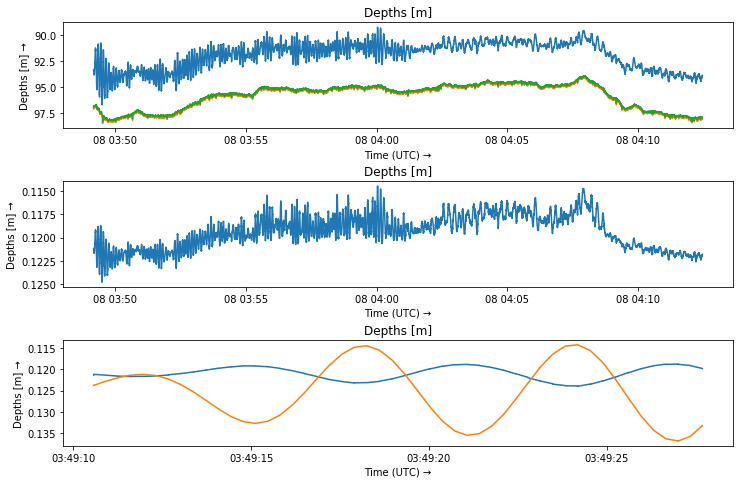

In [2]:
integration.draw()

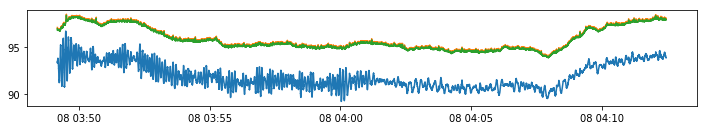

In [3]:
# Induced heave plot (z offtx in motion minus z of tx at rest)
h_trans=integration.vessel.lever_arm_trans-integration.lever_arm_trans_tx
integration.qc()